### Autoencoders

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
base_dir = "/Users/raphael.alabi/Downloads/dataset/"

In [7]:
def load_data(path):
    high_res_images = []
    low_res_images = []
    for dirname, _, filenames in os.walk(path+'low_res'):
        for filename in filenames:
            img = cv2.imread(os.path.join(dirname, filename))
            img = process_image(img)
            low_res_images.append(img)
        
    for dirname, _, filenames in os.walk(path+'high_res'):
        for filename in filenames:
            img = cv2.imread(os.path.join(dirname, filename))
            img = process_image(img)
            high_res_images.append(img)
    
    return np.array(low_res_images), np.array(high_res_images)

def process_image(image):
    return image/255

In [8]:
train_x, train_y =  load_data(base_dir+'train/')
val_x, val_y = load_data(base_dir+'val/')

In [9]:
train_x.shape

(685, 256, 256, 3)

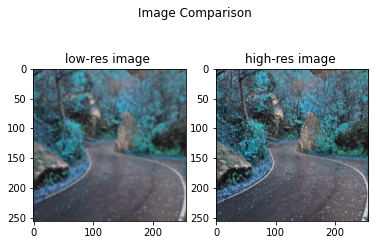

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Image Comparison')
ax1.imshow(train_x[25])
ax1.title.set_text("low-res image ")
ax2.imshow(train_y[25])
ax2.title.set_text("high-res image ")

In [14]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import tensorflow as tf

def build_model():
    input_img = Input(shape=(256, 256, 3))
    l1 = Conv2D(64, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(input_img)
    l2 = Conv2D(64, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l1)

    l3 = MaxPooling2D(padding='same')(l2)
    l3 = Dropout(0.3)(l3)
    l4 = Conv2D(128, (3, 3),  padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l3)
    l5 = Conv2D(128, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l4)

    l6 = MaxPooling2D(padding='same')(l5)
    l7 = Conv2D(256, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l6)
    
    l8 = UpSampling2D()(l7)

    l9 = Conv2D(128, (3, 3), padding='same', activation='relu',
                activity_regularizer=regularizers.l1(10e-10))(l8)
    l10 = Conv2D(128, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10))(l9)

    l11 = add([l5, l10])
    l12 = UpSampling2D()(l11)
    l13 = Conv2D(64, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10))(l12)
    l14 = Conv2D(64, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10))(l13)

    l15 = add([l14, l2])

    decoded = Conv2D(3, (3, 3), padding='same', activation='relu', 
                     activity_regularizer=regularizers.l1(10e-10))(l15)


    model = Model(input_img, decoded)
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
## Generating a NEW architecture with BN and 

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import tensorflow as tf

def build_model():
    input_img = Input(shape=(256, 256, 3))
    l1 = Conv2D(64, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10),kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False))(input_img)
    l2 = Conv2D(64, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10),kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False))(l1)

    l3 = MaxPooling2D(padding='same')(l2)
    l3 = Dropout(0.3)(l3)
    l4 = Conv2D(128, (3, 3),  padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10),kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False))(l3)
    l5 = Conv2D(128, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10),kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False))(l4)

    l6 = MaxPooling2D(padding='same')(l5)
    l7 = Conv2D(256, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10),kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False))(l6)
    
    l8 = UpSampling2D()(l7)

    l9 = Conv2D(128, (3, 3), padding='same', activation='relu',
                activity_regularizer=regularizers.l1(10e-10),kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False))(l8)
    l10 = Conv2D(128, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10),kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False))(l9)

    l11 = add([l5, l10])
    l12 = UpSampling2D()(l11)
    l13 = Conv2D(64, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10),kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False))(l12)
    l14 = Conv2D(64, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10),kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False))(l13)

    l15 = add([l14, l2])

    decoded = Conv2D(3, (3, 3), padding='same', activation='relu', 
                     activity_regularizer=regularizers.l1(10e-10),kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False))(l15)


    model = Model(input_img, decoded)
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

In [15]:
with tf.device('/device:GPU:0'):
    model = build_model()
    train_x , train_y = train_x , train_y
    val_x , val_y = val_x, val_y

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [18]:
def train(train_x, train_y, epochs = 1, batch_size = 32, shuffle = False):
    model.fit(train_x, train_y,epochs= epochs,batch_size=batch_size,shuffle=shuffle)

In [24]:
train(train_x, train_y, epochs = 40, batch_size = 8, shuffle = True)

Epoch 1/40
685/685 [==============================] - 1211s 2s/sample - loss: 0.0012
Epoch 2/40
685/685 [==============================] - 1200s 2s/sample - loss: 0.0011
Epoch 3/40
685/685 [==============================] - 1248s 2s/sample - loss: 0.0014
Epoch 4/40
685/685 [==============================] - 1217s 2s/sample - loss: 0.0012
Epoch 5/40
685/685 [==============================] - 1194s 2s/sample - loss: 0.0011
Epoch 6/40
685/685 [==============================] - 1187s 2s/sample - loss: 0.0011
Epoch 7/40
685/685 [==============================] - 1180s 2s/sample - loss: 0.0011
Epoch 8/40
685/685 [==============================] - 1184s 2s/sample - loss: 0.0011
Epoch 9/40
685/685 [==============================] - 1219s 2s/sample - loss: 0.0011
Epoch 10/40
685/685 [==============================] - 1245s 2s/sample - loss: 0.0011
Epoch 11/40
685/685 [==============================] - 1218s 2s/sample - loss: 0.0011
Epoch 12/40
685/685 [==============================] - 1394s 2s

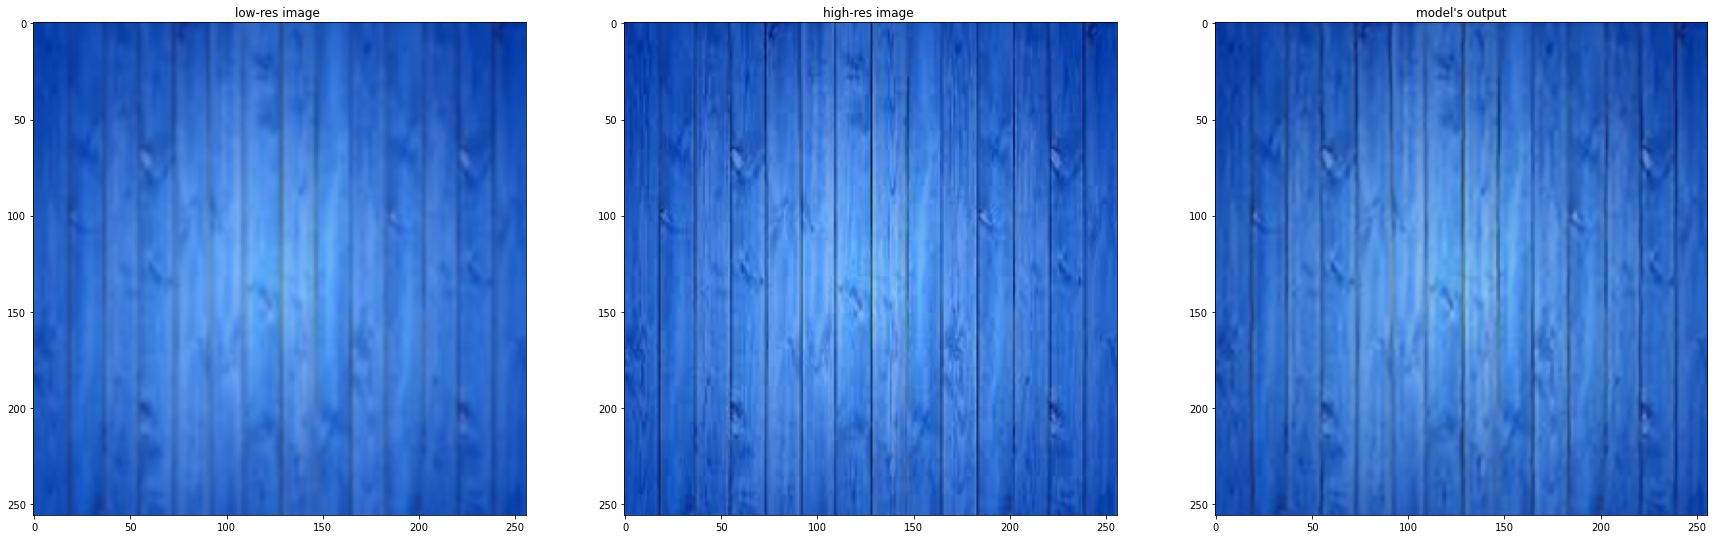

<Figure size 2880x2880 with 0 Axes>

In [25]:
predict_y = model.predict(val_x)
#plt.subplots(2,2,figsize=(15,15))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,30))
plt.figure(figsize=(40,40))
ax1.imshow(val_x[20])
ax1.title.set_text("low-res image ")
ax2.imshow(val_y[20])
ax2.title.set_text("high-res image ")
ax3.imshow(predict_y[20])
ax3.title.set_text("model's output")

In [33]:
tee = np.expand_dims(val_x[0],axis=0)
tee.shape

(1, 256, 256, 3)

In [40]:
import time
num=0

def run_and_return_image(num):
    
    tee = np.expand_dims(val_x[num],axis=0)

    start = time.time()
    pred_next = model.predict(tee)
    end_time = time.time()-start
    print('It took this long to run inference {}'.format(end_time))

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,30))
    plt.figure(figsize=(40,40))
    ax1.imshow(val_x[num])
    ax1.title.set_text("low-res image ")
    ax2.imshow(val_y[num])
    ax2.title.set_text("high-res image ")
    ax3.imshow(pred_next[0])
    ax3.title.set_text("model's output")
    return None


In [43]:
def run_image_localizer(numpy_image):
    
    image = np.expand_dims(numpy_image,axis=0)
    pred_next = model.predict(image)
    return  pred_next[0]

In [44]:
def run_multiple_times(num,numpy_image):
    
    for run in range(0,num+1):
        image = run_image_localizer(numpy_image)
        numpy_image = image
    return numpy_image

In [53]:
Zee= run_multiple_times(2,val_x[50])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


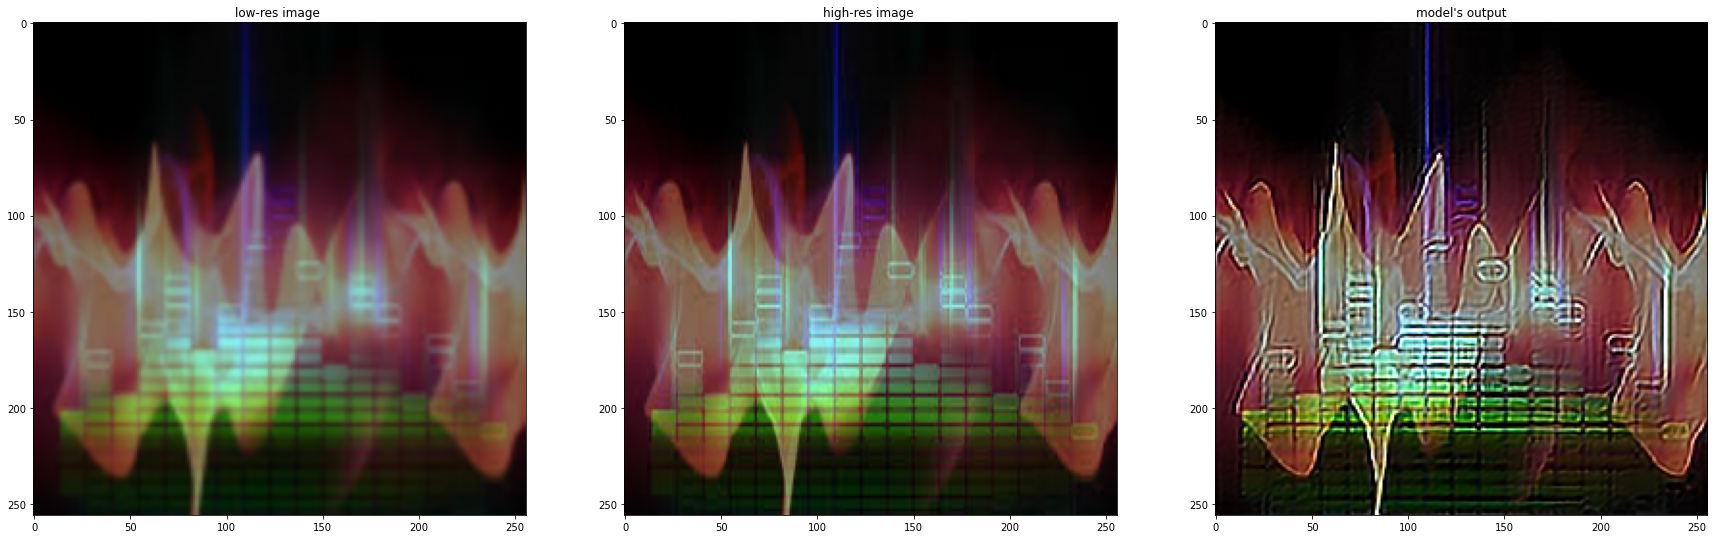

<Figure size 2880x2880 with 0 Axes>

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,30))
plt.figure(figsize=(40,40))
ax1.imshow(val_x[50])
ax1.title.set_text("low-res image ")
ax2.imshow(val_y[50])
ax2.title.set_text("high-res image ")
ax3.imshow(Zee)
ax3.title.set_text("model's output")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


It took this long to run inference 0.5459599494934082


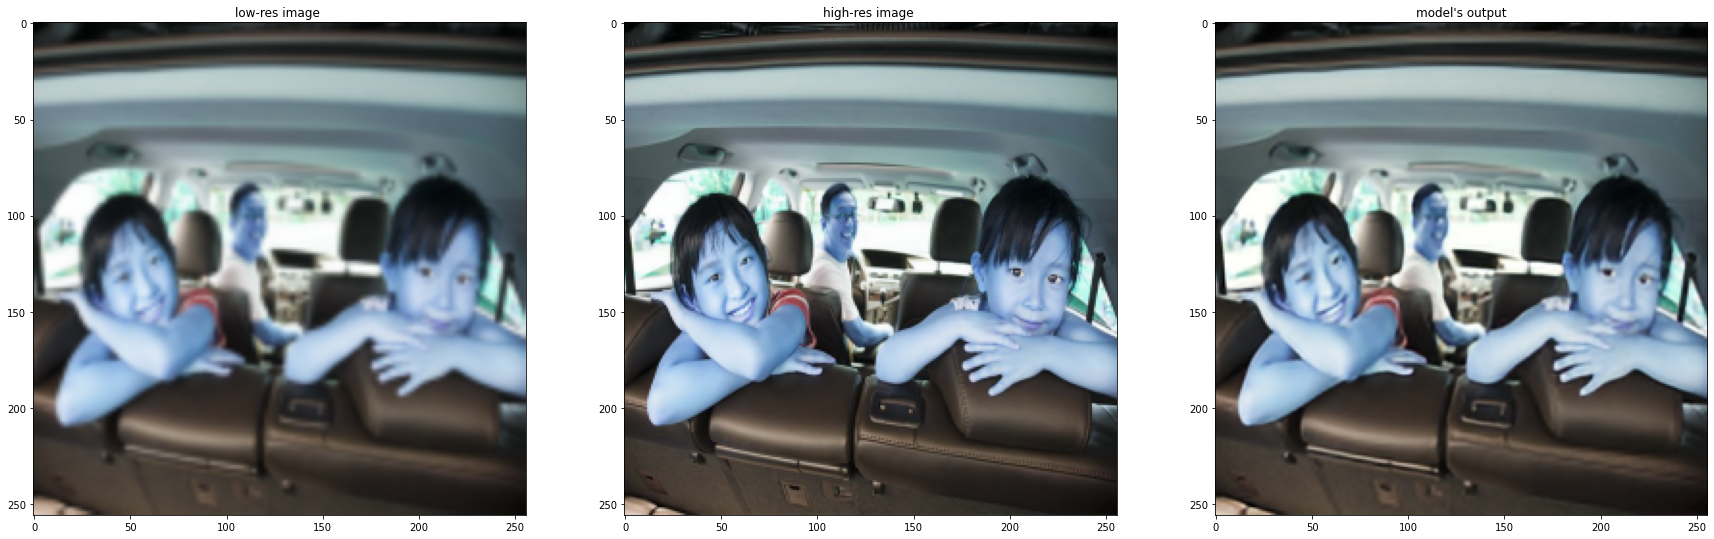

<Figure size 2880x2880 with 0 Axes>

In [42]:
run_and_return_image(25)

In [ ]:
# Run the image through 4 times and see if the  prediction does. get better and maybe outperform the initial input. data
runs = 4
num 

for run in runs:
    

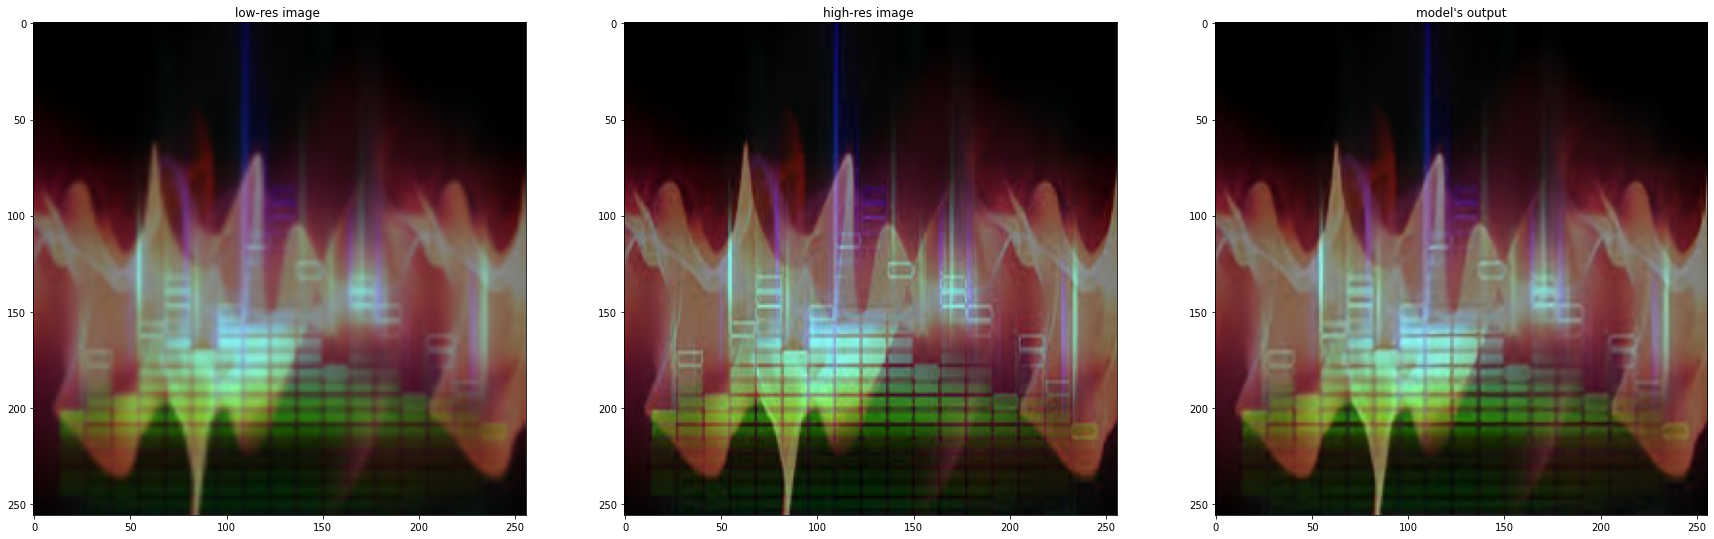

<Figure size 2880x2880 with 0 Axes>

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,30))
plt.figure(figsize=(40,40))
ax1.imshow(val_x[50])
ax1.title.set_text("low-res image ")
ax2.imshow(val_y[50])
ax2.title.set_text("high-res image ")
ax3.imshow(predict_y[50])
ax3.title.set_text("model's output")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


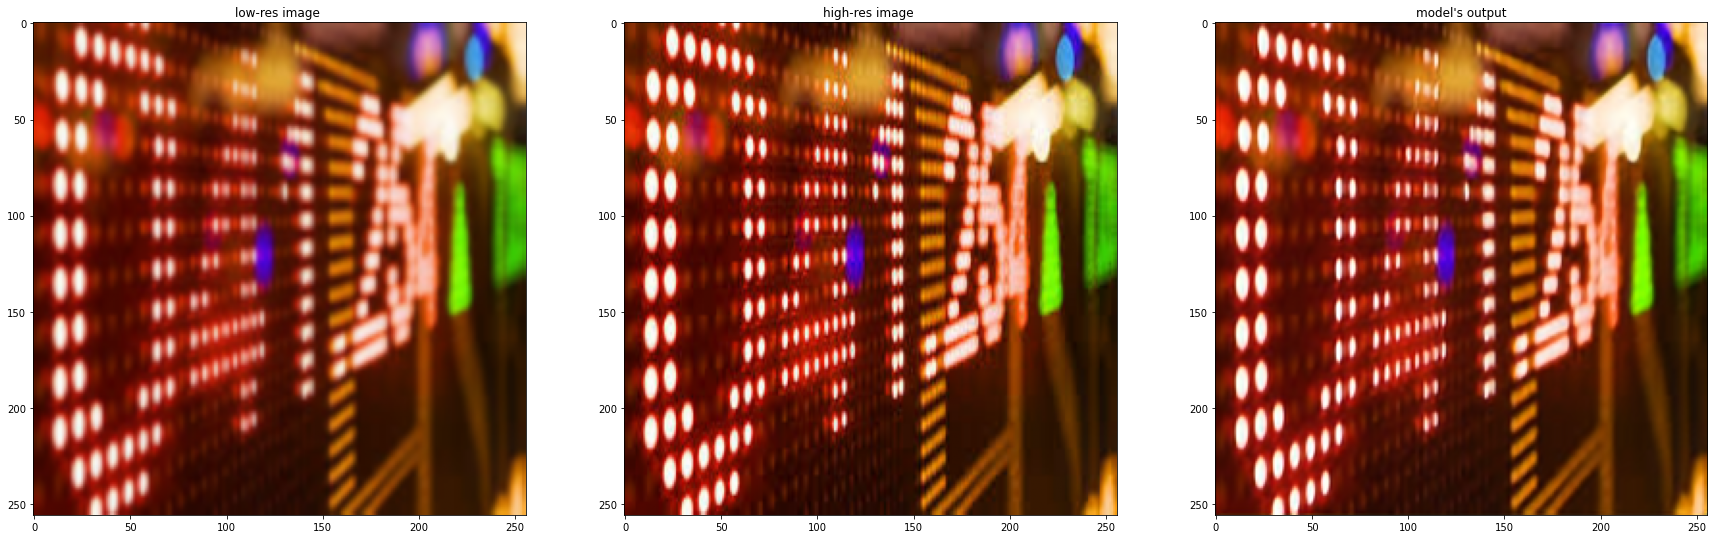

<Figure size 2880x2880 with 0 Axes>

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,30))
plt.figure(figsize=(40,40))
ax1.imshow(val_x[13])
ax1.title.set_text("low-res image ")
ax2.imshow(val_y[13])
ax2.title.set_text("high-res image ")
ax3.imshow(predict_y[13])
ax3.title.set_text("model's output")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


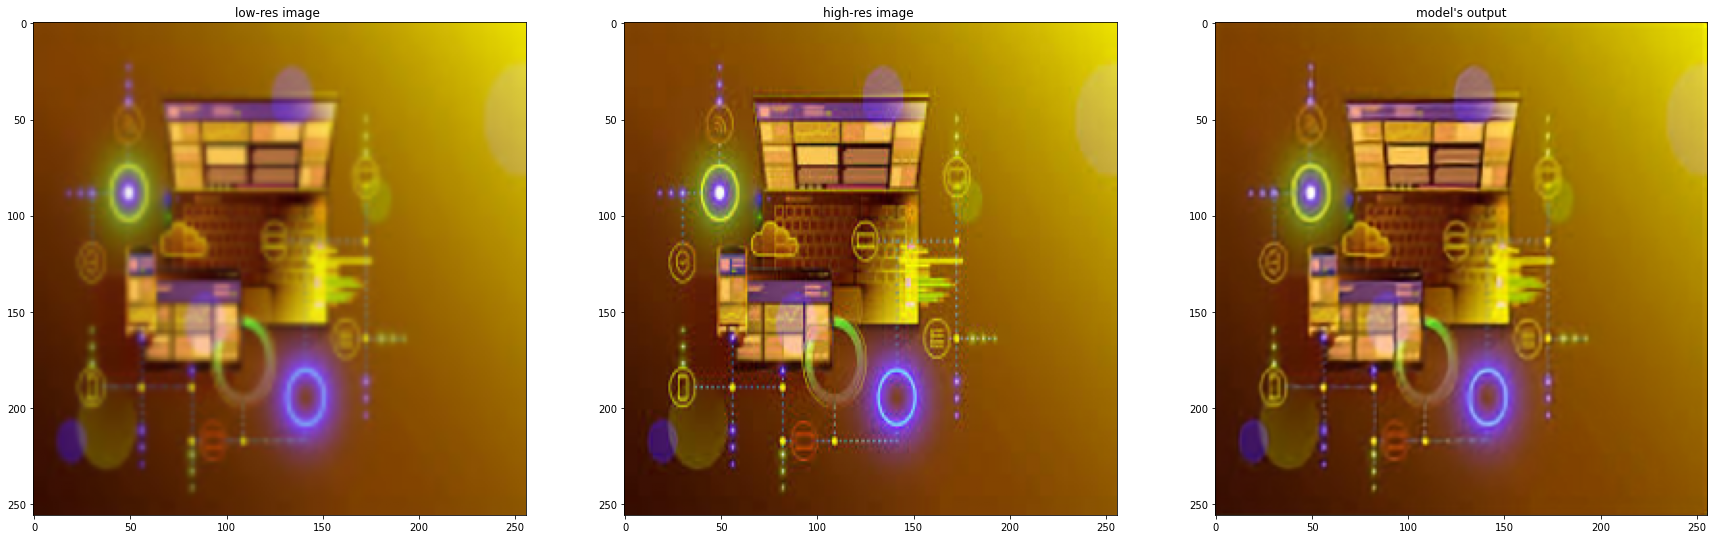

<Figure size 2880x2880 with 0 Axes>

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,30))
plt.figure(figsize=(40,40))
ax1.imshow(val_x[60])
ax1.title.set_text("low-res image ")
ax2.imshow(val_y[60])
ax2.title.set_text("high-res image ")
ax3.imshow(predict_y[60])
ax3.title.set_text("model's output")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


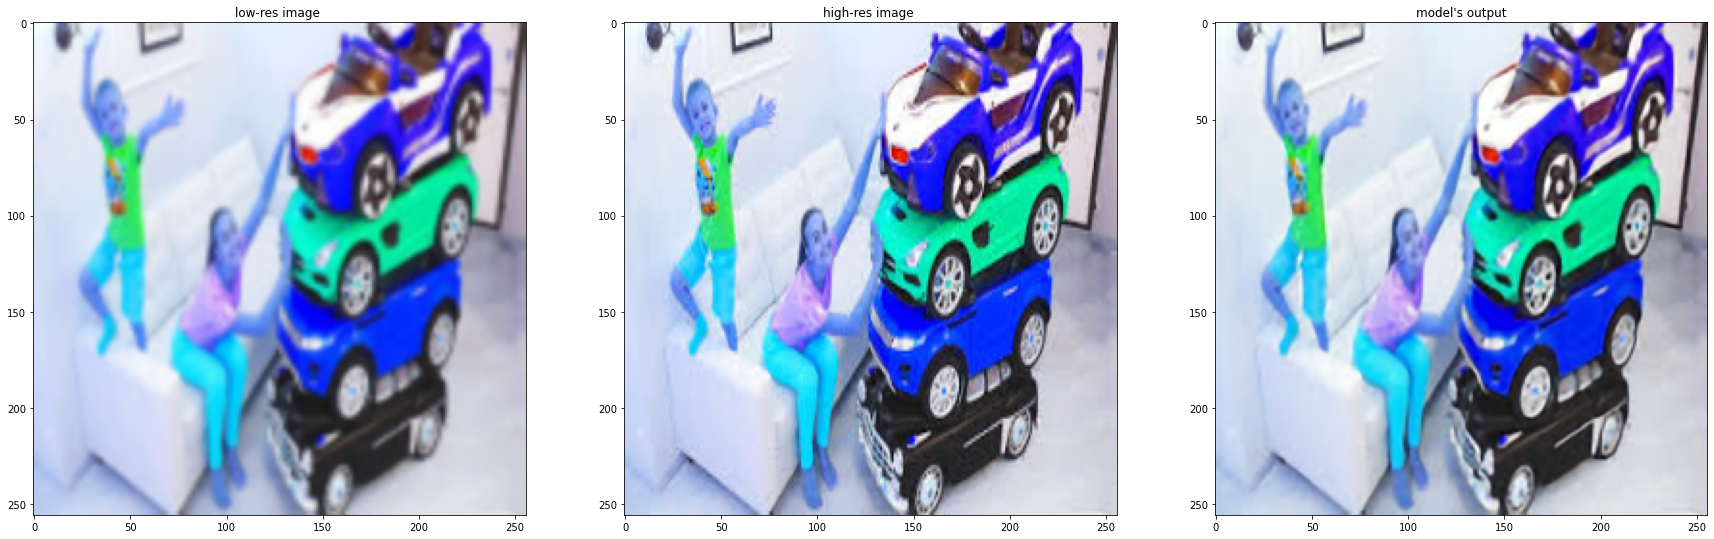

<Figure size 2880x2880 with 0 Axes>

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,30))
plt.figure(figsize=(40,40))
ax1.imshow(val_x[9])
ax1.title.set_text("low-res image ")
ax2.imshow(val_y[9])
ax2.title.set_text("high-res image ")
ax3.imshow(predict_y[9])
ax3.title.set_text("model's output")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


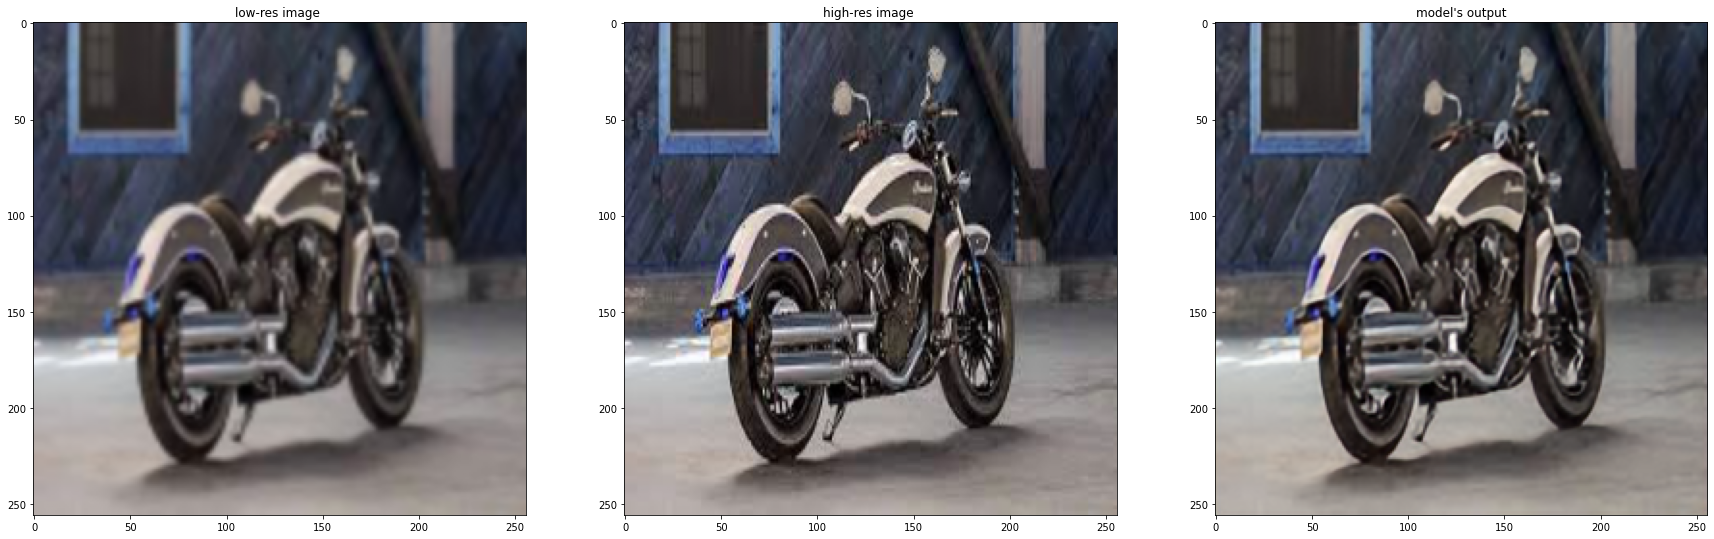

<Figure size 2880x2880 with 0 Axes>

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,30))
plt.figure(figsize=(40,40))
ax1.imshow(val_x[19])
ax1.title.set_text("low-res image ")
ax2.imshow(val_y[19])
ax2.title.set_text("high-res image ")
ax3.imshow(predict_y[19])
ax3.title.set_text("model's output")